In [10]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import neurobiases
import numpy as np
import os

from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from sklearn.utils.extmath import cartesian

%matplotlib inline

In [2]:
results_path = os.path.join(os.environ['HOME'], 'fits/neurobiases/exp2.npz')

In [3]:
results = np.load(results_path)

In [4]:
list(results)

['scores',
 'a_est',
 'a_true',
 'b_est',
 'b_true',
 'B_est',
 'B_true',
 'Psi_est',
 'Psi_true',
 'L_est',
 'L_true']

In [5]:
a_true = results['a_true'][:]
a_est = results['a_est'][:]
b_true = results['b_true'][:]
b_est = results['b_est'][:]
B_true = results['B_true'][:].reshape((10, 15))
B_est = results['B_est'][:]
Psi_true = results['Psi_true'][:]
Psi_est = results['Psi_est'][:]
scores = results['scores'][:].reshape((30, 30, -1))

In [7]:
N = a_true.size
M = b_true.size

# Selection Ratio

In [8]:
a_srs = np.median((np.count_nonzero(a_est, axis=2) / N).reshape((30, 30, -1)), axis=2)
b_srs = np.median((np.count_nonzero(b_est, axis=2) / M).reshape((30, 30, -1)), axis=2)
B_srs = np.median((np.count_nonzero(B_est, axis=(2, 3)) / (N * M)).reshape((30, 30, -1)), axis=2)

Text(0, 0.5, '\\textbf{Selection Ratio}')

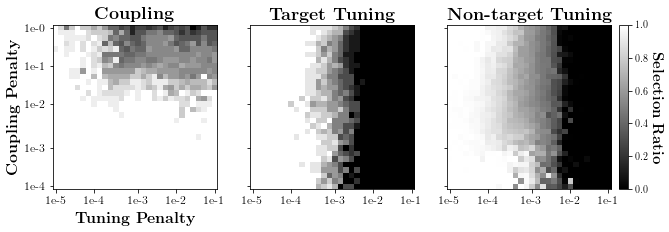

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(10, 4), sharex=True, sharey=True)

axes[0].imshow(a_srs, vmin=0, vmax=1)
axes[1].imshow(b_srs, vmin=0, vmax=1)
img = axes[2].imshow(B_srs, vmin=0, vmax=1)

axes[0].set_xlabel(r'\textbf{Tuning Penalty}', fontsize=16)
axes[0].set_ylabel(r'\textbf{Coupling Penalty}', fontsize=16)

axes[0].set_xticks([0, 7, 15, 22, 29])
axes[1].set_yticks([0, 7, 15, 22, 29])

for ax in axes:
    ax.set_xticklabels(['1e-5', '1e-4', '1e-3', '1e-2', '1e-1'], fontsize=12)
    ax.set_yticklabels(['1e-4', '1e-3', '1e-2', '1e-1', '1e-0'], fontsize=12)
    
axes[0].set_title(r'\textbf{Coupling}', fontsize=18)
axes[1].set_title(r'\textbf{Target Tuning}', fontsize=18)
axes[2].set_title(r'\textbf{Non-target Tuning}', fontsize=18)

[[x0, y0], [x1, y1]] = axes[2].get_position().get_points()
cax = fig.add_axes([x1 + 0.05 * (x1 - x0), y0, 0.05 * (x1 - x0), (y1 - y0)])
cb = fig.colorbar(img, cax=cax)
cb.ax.tick_params(labelsize=10)
cb.ax.set_ylabel(r'\textbf{Selection Ratio}', fontsize=15, labelpad=15, rotation=270)

# Selection Accuracy

In [11]:
a_est_masks = a_est != 0
b_est_masks = b_est != 0
B_est_masks = B_est != 0

In [24]:
b_mask = b_true != 0
a_mask = a_true != 0
B_mask = B_true != 0

In [26]:
a_norm = np.sum(a_est_masks, axis=2) + np.sum(a_mask)
b_norm = np.sum(b_est_masks, axis=2) + np.sum(b_mask)
B_norm = np.sum(B_est_masks, axis=(2, 3)) + np.sum(B_mask)

In [27]:
a_sa = np.median(1 - np.sum(a_est_masks != a_mask, axis=2) / a_norm, axis=1).reshape((30, 30))
b_sa = np.median(1 - np.sum(b_est_masks != b_mask, axis=2) / b_norm, axis=1).reshape((30, 30))
B_sa = np.median(1 - np.sum(B_est_masks != B_mask, axis=(2, 3)) / B_norm, axis=1).reshape((30, 30))

Text(0, 0.5, '\\textbf{Selection Ratio}')

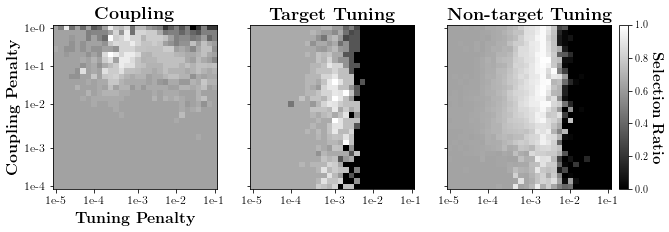

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(10, 4), sharex=True, sharey=True)

axes[0].imshow(a_sa, vmin=0, vmax=1)
axes[1].imshow(b_sa, vmin=0, vmax=1)
img = axes[2].imshow(B_sa, vmin=0, vmax=1)

axes[0].set_xlabel(r'\textbf{Tuning Penalty}', fontsize=16)
axes[0].set_ylabel(r'\textbf{Coupling Penalty}', fontsize=16)

axes[0].set_xticks([0, 7, 15, 22, 29])
axes[1].set_yticks([0, 7, 15, 22, 29])

for ax in axes:
    ax.set_xticklabels(['1e-5', '1e-4', '1e-3', '1e-2', '1e-1'], fontsize=12)
    ax.set_yticklabels(['1e-4', '1e-3', '1e-2', '1e-1', '1e-0'], fontsize=12)
    
axes[0].set_title(r'\textbf{Coupling}', fontsize=18)
axes[1].set_title(r'\textbf{Target Tuning}', fontsize=18)
axes[2].set_title(r'\textbf{Non-target Tuning}', fontsize=18)

[[x0, y0], [x1, y1]] = axes[2].get_position().get_points()
cax = fig.add_axes([x1 + 0.05 * (x1 - x0), y0, 0.05 * (x1 - x0), (y1 - y0)])
cb = fig.colorbar(img, cax=cax)
cb.ax.tick_params(labelsize=10)
cb.ax.set_ylabel(r'\textbf{Selection Ratio}', fontsize=15, labelpad=15, rotation=270)

# Cross-validated Log-likelihood

In [ ]:
mean_scores = np.mean(scores, axis=2)

In [ ]:
best_score = np.unravel_index(np.argmax(mean_scores), mean_scores.shape)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(np.sort(-mean_scores.ravel()), linewidth=3, color='black')
ax.set_xlabel(r'\textbf{CV Index}', fontsize=20)
ax.set_ylabel(r'\textbf{Mean CV Negative LL}', fontsize=20)

ax.set_yscale('log')
ax.set_xlim([0, 900])
ax.set_ylim([1e4, 1e6])
ax.tick_params(labelsize=15)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(np.sort(-mean_scores.ravel()), linewidth=3, color='black')
ax.set_xlabel(r'\textbf{CV Index}', fontsize=20)
ax.set_ylabel(r'\textbf{Mean CV Negative LL}', fontsize=20)

ax.set_yscale('log')
ax.set_xlim([0, 300])
ax.set_ylim([21100, 21500])
ax.tick_params(labelsize=15)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.hist(mean_scores.ravel(), color='gray',
        bins=np.linspace(-21500, -21100, 15))
ax.set_xlabel(r'\textbf{CV Index}', fontsize=20)
ax.set_ylabel(r'\textbf{Mean CV Negative LL}', fontsize=20)

ax.set_xlim([-21500, -21100])

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

img = ax.imshow(mean_scores, vmin=-30000, vmax=-20000)

ax.set_xlabel(r'\textbf{Tuning Penalty}', fontsize=16)
ax.set_ylabel(r'\textbf{Coupling Penalty}', fontsize=16)

ax.set_xticks([0, 7, 15, 22, 29])
ax.set_yticks([0, 7, 15, 22, 29])
ax.set_xticklabels(['1e-5', '1e-4', '1e-3', '1e-2', '1e-1'], fontsize=12)
ax.set_yticklabels(['1e-4', '1e-3', '1e-2', '1e-1', '1e-0'], fontsize=12)

ax.scatter(best_score[1], best_score[0], color='red', marker='x')

[[x0, y0], [x1, y1]] = ax.get_position().get_points()
cax = fig.add_axes([x1 + 0.05 * (x1 - x0), y0, 0.05 * (x1 - x0), (y1 - y0)])
cb = fig.colorbar(img, cax=cax)
cb.ax.tick_params(labelsize=10)
cb.ax.set_ylabel(r'\textbf{Held out Log-Likelihood}', fontsize=15, labelpad=20, rotation=270)

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for idx in range(mean_scores.shape[0]):
    axes[0].plot(-mean_scores[idx], color='gray', alpha=0.5)
    axes[1].plot(-mean_scores[:, idx], color='gray', alpha=0.5)

for ax in axes:
    ax.set_xticks([0, 7, 15, 22, 29])
    ax.set_yscale('log')
    ax.set_ylim([1e4, 1e6])
    ax.tick_params(labelsize=13)
    ax.set_ylabel(r'\textbf{Negative LL}', fontsize=15)
    ax.set_xlabel(r'\textbf{Regularization Penalty}', fontsize=15)

axes[0].set_xticklabels(['1e-4', '1e-3', '1e-2', '1e-1', '1e-0'], fontsize=12)
axes[1].set_xticklabels(['1e-5', '1e-4', '1e-3', '1e-2', '1e-1'], fontsize=12)

axes[0].set_title(r'\textbf{Tuning}', fontsize=16)
axes[1].set_title(r'\textbf{Coupling}', fontsize=16)
plt.tight_layout()

# Bias 

In [ ]:
b_mask = b_true != 0
a_mask = a_true != 0
a_nz = a_true[a_mask]
b_nz = b_true[b_mask]

In [ ]:
a_bias = np.mean(np.median(a_est - a_true, axis=1).reshape((30, 30, -1)), axis=-1)
b_bias = np.mean(np.median(b_est - b_true, axis=1).reshape((30, 30, -1)), axis=-1)
B_bias = np.mean(np.median(B_est - B_true, axis=1).reshape((30, 30, 10, 15)), axis=(2, 3))

In [ ]:
a_bias.min()

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 6), sharex=True, sharey=True)

plt.subplots_adjust(wspace=0.5)

img1 = axes[0].imshow(a_bias, vmin=-1, vmax=1, cmap='RdGy')
img2 = axes[1].imshow(b_bias, vmin=-100, vmax=100, cmap='RdGy')
img3 = axes[2].imshow(B_bias, vmin=-50, vmax=50, cmap='RdGy')

axes[0].set_xticks([0, 7, 15, 22, 29])
axes[1].set_yticks([0, 7, 15, 22, 29])

for ax in axes:
    ax.set_xticklabels(['1e-5', '1e-4', '1e-3', '1e-2', '1e-1'], fontsize=12)
    ax.set_yticklabels(['1e-4', '1e-3', '1e-2', '1e-1', '1e-0'], fontsize=12)
    
axes[0].set_title(r'\textbf{Coupling}', fontsize=18)
axes[1].set_title(r'\textbf{Target Tuning}', fontsize=18)
axes[2].set_title(r'\textbf{Non-target Tuning}', fontsize=18)

[[x0, y0], [x1, y1]] = axes[0].get_position().get_points()
cax1 = fig.add_axes([x1 + 0.05 * (x1 - x0), y0, 0.05 * (x1 - x0), (y1 - y0)])
cb = fig.colorbar(img1, cax=cax1)
cb.ax.tick_params(labelsize=10)
cb.ax.set_ylabel(r'\textbf{Bias}', fontsize=15, labelpad=20, rotation=270)

[[x0, y0], [x1, y1]] = axes[1].get_position().get_points()
cax1 = fig.add_axes([x1 + 0.05 * (x1 - x0), y0, 0.05 * (x1 - x0), (y1 - y0)])
cb = fig.colorbar(img2, cax=cax1)
cb.ax.tick_params(labelsize=10)
cb.ax.set_ylabel(r'\textbf{Bias}', fontsize=15, labelpad=20, rotation=270)


[[x0, y0], [x1, y1]] = axes[2].get_position().get_points()
cax1 = fig.add_axes([x1 + 0.05 * (x1 - x0), y0, 0.05 * (x1 - x0), (y1 - y0)])
cb = fig.colorbar(img3, cax=cax1)
cb.ax.tick_params(labelsize=10)
cb.ax.set_ylabel(r'\textbf{Bias}', fontsize=15, labelpad=20, rotation=270)


In [ ]:
a_nz_bias = np.mean(np.median((a_est[..., a_mask] - a_nz)/np.abs(a_nz), axis=1).reshape((30, 30, -1)), axis=-1)
b_nz_bias = np.mean(np.median((b_est[..., b_mask] - b_nz)/np.abs(b_nz), axis=1).reshape((30, 30, -1)), axis=-1)


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)

plt.subplots_adjust(wspace=0.5)

img1 = axes[0].imshow(a_nz_bias, vmin=-2, vmax=2, cmap='RdGy')
img2 = axes[1].imshow(b_nz_bias, vmin=-2, vmax=2, cmap='RdGy')

axes[0].set_xticks([0, 7, 15, 22, 29])
axes[1].set_yticks([0, 7, 15, 22, 29])

for ax in axes:
    ax.set_xticklabels(['1e-5', '1e-4', '1e-3', '1e-2', '1e-1'], fontsize=12)
    ax.set_yticklabels(['1e-4', '1e-3', '1e-2', '1e-1', '1e-0'], fontsize=12)
    
axes[0].set_title(r'\textbf{Coupling}', fontsize=18)
axes[1].set_title(r'\textbf{Target Tuning}', fontsize=18)

[[x0, y0], [x1, y1]] = axes[0].get_position().get_points()
cax1 = fig.add_axes([x1 + 0.05 * (x1 - x0), y0, 0.05 * (x1 - x0), (y1 - y0)])
cb = fig.colorbar(img1, cax=cax1)
cb.ax.tick_params(labelsize=10)
cb.ax.set_ylabel(r'\textbf{Normalized Bias}', fontsize=15, labelpad=20, rotation=270)

[[x0, y0], [x1, y1]] = axes[1].get_position().get_points()
cax1 = fig.add_axes([x1 + 0.05 * (x1 - x0), y0, 0.05 * (x1 - x0), (y1 - y0)])
cb = fig.colorbar(img2, cax=cax1)
cb.ax.tick_params(labelsize=10)
cb.ax.set_ylabel(r'\textbf{Normalized Bias}', fontsize=15, labelpad=20, rotation=270)